# Importing libraries and loading the data

In [ ]:
!pip install cartopy
!pip install chart_studio

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import cartopy.crs as ccrs

import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('drive/')

Mounted at drive/


In [ ]:
base_path = "/content/drive/MyDrive/notebooks-share/"

In [ ]:
reviewdf = pd.read_pickle(base_path+"yelp_academic_dataset_review.pkl")
userdf = pd.read_pickle(base_path+"yelp_academic_dataset_user.pkl")

In [ ]:
reviewdf.head()

,useful,user_id,date,cool,funny,stars,business_id,review_id
0,5,OwjRMXRC0KyPrIlcjaXeFQ,2015-04-15 05:21:16,0,0,2.0,-MhfebM0QIsKt87iDN-FNw,xQY8N_XvtGbearJ5X4QryQ
1,1,nIJD_7ZXHq-FX8byPMOkMQ,2013-12-07 03:16:52,0,1,1.0,lbrU8StCq3yDfr-QMnGrmQ,UmFMZ8PyXZTY2QcwzsfQYA
2,1,V34qejxNsCbcgD8C0HVk-Q,2015-12-05 03:18:11,0,0,5.0,HQl28KMwrEKHqhFrrDqVNQ,LG2ZaYiOgpr2DK_90pYjNw
3,0,ofKDkJKXSKZXu5xJNGiiBQ,2011-05-27 05:30:52,0,0,1.0,5JxlZaqCnk1MnbgRirs40Q,i6g_oA9Yf9Y31qt0wibXpw
4,0,UgMW8bLE0QMJDCkQ1Ax5Mg,2017-01-14 21:56:57,0,0,4.0,IS4cv902ykd8wj1TR0N3-A,6TdNDKywdbjoTkizeMce8A


In [ ]:
userdf.head()

,yelping_since,friends,average_stars,cool,funny,fans,name,review_count,useful,user_id,friends_count
0,2007-07-06 03:27:11,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",3.57,227,225,14,Rafael,553,628,ntlvfPzc8eglqvk92iDIAw,45
1,2008-04-28 01:29:25,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",3.84,400,316,27,Michelle,564,790,FOBRPlBHa3WPHFB5qYDlVg,213
2,2008-08-28 23:40:05,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",3.44,103,125,5,Martin,60,151,zZUnPeh2hEp0WydbAZEOOg,35
3,2008-09-20 00:08:14,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",3.08,84,160,6,John,206,233,QaELAmRcDc5TfJEylaaP8g,173
4,2008-08-09 00:30:27,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",4.37,512,400,78,Anne,485,1265,xvu8G900tezTzbbfqmTKvA,895


In [ ]:
businessdf = pd.read_json(base_path+'yelp_academic_dataset_business.json', lines = True)
checkindf = pd.read_json(base_path+'yelp_academic_dataset_checkin.json', lines = True)
tipsdf = pd.read_json(base_path+'yelp_academic_dataset_tip.json', lines = True)

In [ ]:
checkindf['business_id'] = checkindf['business_id'].apply(lambda x: x.replace('-', ''))
checkindf.head()

,business_id,date
0,1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,7zmmkVgIMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,9QQLMTbFzLJ_oTON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [ ]:
tipsdf.head()

,user_id,business_id,text,date,compliment_count
0,hf27xTME3EiCp6NL6VtWZQ,UYX5zL_Xj9WEc_Wp-FrqHw,Here for a quick mtg,2013-11-26 18:20:08,0
1,uEvusDwoSymbJJ0auR3muQ,Ch3HkwQYv1YKw_FO06vBWA,Cucumber strawberry refresher,2014-06-15 22:26:45,0
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0


In [ ]:
#keeping only open businesses
business_opendf = businessdf[businessdf['is_open']==1]

In [ ]:
#drop hours and is open from business_opendf
drop_columns = ['hours','is_open']
business_clean = business_opendf.drop(drop_columns, axis=1)

In [ ]:
business_clean.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,..."
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,None,"Pets, Pet Services, Pet Groomers"
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma..."
5,cKyLV5oWZJ2NudWgqs8VZw,Oasis Auto Center - Gilbert,"1720 W Elliot Rd, Ste 105",Gilbert,AZ,85233,33.350399,-111.827142,4.5,38,{'BusinessAcceptsCreditCards': 'True'},"Auto Repair, Automotive, Oil Change Stations, ..."


In [ ]:
print('Total number of users:', userdf.shape[0])
print('Total number of reviews:', reviewdf.shape[0])
print('Total number of tips:', tipsdf.shape[0])
print('Total number of businesses:', businessdf.shape[0])
print('Total number of businesses open:', business_clean.shape[0])
print('Total number of checkins:', checkindf.shape[0])

Total number of users: 1968703
Total number of reviews: 8021122
Total number of tips: 1320761
Total number of businesses: 209393
Total number of businesses open: 168903
Total number of checkins: 175187


# EDA

### Business Data

In [ ]:
# to select only categories that are restaurants or food related, we need to expand the categories in our business data
categories_explode = business_clean.assign(categories = business_clean.categories.str.split(', ')).explode('categories')

In [ ]:
print('Total number of categories:',len(categories_explode.categories.value_counts()))
print('Top 10 categories:')
categories_explode.categories.value_counts()[:10]

Total number of categories: 1324
Top 10 categories:


Restaurants                  43965
Shopping                     28480
Food                         24844
Home Services                20653
Health & Medical             17626
Beauty & Spas                17293
Local Services               14319
Automotive                   13149
Nightlife                     9818
Event Planning & Services     9500
Name: categories, dtype: int64

In [ ]:
# get categories count
cat_count = categories_explode.categories.value_counts()
cat_count = cat_count.sort_values(ascending = False)
cat_count = cat_count.iloc[0:10]
# create a df from cat_count to make plotting easier
cat_count_df = pd.DataFrame(cat_count)
cat_count_df.reset_index(inplace=True)

In [ ]:
# plot a bar graph
fig = px.bar(cat_count_df, x='index', y='categories', text='categories', width=1300, height=700,
             labels={
                      'index': 'Business Type',
                      'categories': 'Count'
                  }, color='categories')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=17,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  title_font_size=30
                  )

fig.show()

### Restaurants category within Business

In [ ]:
# make a dataframe with only restaurants
restaurantsdf = categories_explode[categories_explode['categories'].str.contains('Restaurants',case=False, na=False)]

In [ ]:
print('Categories that contain keywords:')
restaurantsdf.categories.value_counts() 

Categories that contain keywords:


Restaurants           43965
Pop-Up Restaurants       16
Name: categories, dtype: int64

In [ ]:
# Drop the duplicate rows
restaurantsdf.drop_duplicates(subset='business_id', inplace=True)
restaurantsdf.reset_index(drop=True, inplace=True)

In [ ]:
restaurantsdf.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...",Restaurants
1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"{'RestaurantsTableService': 'False', 'Restaura...",Restaurants
2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants
3,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,"{'Ambience': '{'touristy': False, 'hipster': F...",Restaurants
4,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants


#### Location of the Restaurants

> Indented block



In [ ]:
#geospatial data for each state
us_statewise_lat_lon = restaurantsdf.groupby(by="state").mean()[["longitude", "latitude"]]

#resturant count per state
statewise_count = restaurantsdf.groupby(by="state").count()[["business_id"]].rename(columns={"business_id":"Count"})

#merge resturant counts dataframe with geospatial dataframe
statewise_count = us_statewise_lat_lon.join(statewise_count).reset_index()

statewise_count.head()

,state,longitude,latitude,Count
0,AB,-113.996623,51.037523,2371
1,AL,-114.154963,51.083016,1
2,AZ,-112.008332,33.486715,7871
3,BC,-79.392189,43.880744,2
4,CA,-114.850269,34.118192,3


In [ ]:
fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.stock_img()
ax.coastlines()
ax.add_feature(cfeature.STATES)

ax.set_extent([-135, -66.5, 20, 55],
              crs=ccrs.PlateCarree()) ## Important


plt.scatter(x=statewise_count.longitude, y=statewise_count.latitude,
            color="orangered",
            s=statewise_count.Count,
            alpha=0.8,
            transform=ccrs.PlateCarree()) ## Important

plt.show()

##### **City Statistics**

In [ ]:
# cities with the most restaurants
restaurantsdf['city_state'] = restaurantsdf['city'] + ',' + restaurantsdf['state']

In [ ]:
# Count total unique cities
city_count = restaurantsdf.city_state.value_counts()
city_count = city_count.sort_values(ascending = False)
city_count = city_count.iloc[0:10]
city_countdf = pd.DataFrame(city_count.copy())
city_countdf.reset_index(inplace=True)

# plot a bar graph
fig = px.bar(city_countdf, x='index', y='city_state', text='city_state', width=1300, height=700,
             labels={
                      'index': 'City, State',
                      'city_state': 'No. of Restaurants'
                  }, title="Top 10 Cities With Most Restaurants", color='city_state')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=16,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  title_font_size=30
                  )

fig.show()

In [ ]:
#cities with the best resturants: only 4.5-5 star rating. 
temp_df = restaurantsdf[(restaurantsdf.review_count > 1000) & (restaurantsdf.stars >= 4.5)]
temp_df = pd.DataFrame(temp_df.city_state.value_counts())
# temp_df.reset_index(inplace=True)
temp_df


,city_state
"Las Vegas,NV",69
"Phoenix,AZ",15
"Scottsdale,AZ",8
"Henderson,NV",5
"Tempe,AZ",4
"Mesa,AZ",3
"Toronto,ON",3
"Pittsburgh,PA",3
"Gilbert,AZ",2
"Montréal,QC",2


In [ ]:
import plotly.graph_objects as go
# Cities With Best Restaurants with ratings 4 and above
colors = ["blue", "green", "black", "purple", "red", "brown"]
fig = go.Figure(data=[go.Pie(labels=temp_df.index,
                            values=temp_df.city_state)])

fig.update_traces(hoverinfo='label+percent', textfont_size=14,
                  textinfo='label+percent',
                  # pull=[0.1, 0, 0.2, 0, 0, 0],
                  marker=dict(line=dict(color='#FFFFFF',
                                        width=2)))
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  legend_font_size=15)

fig.show()

#### Restaurant Statistics

In [ ]:
res_count = restaurantsdf.name.value_counts()
res_count = res_count.sort_values(ascending = False)
res_count = res_count.iloc[0:10]

res_countdf = pd.DataFrame(res_count.copy())
res_countdf.reset_index(inplace=True)

# plot a bar graph
fig = px.bar(res_countdf, x='index', y='name', text='name', width=1300, height=700,
             labels={
                      'index': 'Restaurant',
                      'name': 'No. of Restaurants'
                  }, title="Restaurant With Most Store Front", color='name')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=18,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="red",
                  title_font_size=35
                  )

fig.show()

In [ ]:
top_10_names = list(res_count.index)
top_10_df = restaurantsdf[restaurantsdf['name'].isin(top_10_names)]

top_10 = top_10_df.groupby('name')[['review_count']].sum().sort_values(by='review_count', ascending=False)
top_10['stars'] = top_10_df.groupby('name')[['stars']].mean().round(decimals=1)
top_10['name'] = top_10.index

# plot
fig = px.scatter(top_10, x="stars", y="review_count", color="name",
                 title="Review Counts and Star Rating of Restaurant With Most Front",
                 width=1000,
                 height=600,
                 size='review_count',
                 labels={'stars': 'Rating', 'review_count': 'Review Counts'})

fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=18,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

In [ ]:
fig = px.box(top_10_df, y="stars", x='name', labels={'name': 'Restaurants', 'stars': 'Star Rating'},
             title='Boxplot of ratiings for restaurants with most store front')
fig.update_layout(margin=dict(t=80, b=0, l=0, r=100),
                  legend_font_size=10,
                  font=dict(size=15))
fig.show()

In [ ]:
# Top 10 reviewed restaurants
sorted_by_rc = restaurantsdf.sort_values(by='review_count', ascending=False).head(10)
sorted_by_rc['name_city'] = sorted_by_rc['name'] + sorted_by_rc['city_state']

# plot
fig = px.scatter(sorted_by_rc, x="stars", y="review_count", color="name_city",
                 title="Top 10 Reviewed Restaurants",
                 width=1200,
                 height=600,
                 size='review_count',
                 labels={'stars': 'Rating', 'review_count': 'Review Counts'})

fig.update_layout(xaxis_tickangle=0, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )
tickfont = dict(tickfont=dict(size=20))
fig.update_layout(margin=dict(t=50, b=0, l=0, r=0),
                  legend_font_size=20,
                  font=dict(size=15),
                  xaxis=tickfont,
                  yaxis=tickfont)

fig.show()

In [ ]:
# top 10 restaurants aka business_id and not name  with only 4.5-5 star rating  with city state, name on x axis
temp_df = restaurantsdf[(restaurantsdf.review_count > 1000) & (restaurantsdf.stars >= 4.5)]
temp_df.sort_values(by='review_count', ascending=False, inplace=True)
top10df = temp_df[['business_id', 'review_count', 'name', 'city_state', 'stars']].head(10).sort_values(by='review_count')
# plot a bar graph
fig = px.bar(top10df, x='name', y='review_count', text='review_count', width=1100, height=700,
             labels={
                      'name': 'Restaurant',
                      'review_count': 'Review Counts'
                  }, title="Best Restaurants According to Review Counts and Stars", color='stars')

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=18,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="green",
                  title_font_size=35
                  )

fig.show()

In [ ]:
# plot
fig = px.scatter(restaurantsdf, x="stars", y="review_count", color="stars",
                 title="Relationship Between Raiting and Review Count",
                 width=1000,
                 height=600,
                 size='review_count',
                labels={'stars': 'Rating', 'review_count': 'Review Counts'})

fig.update_layout(xaxis_tickangle=0, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

In [ ]:
restaurantsdf['attributes'] = restaurantsdf['attributes'].apply(lambda x: {} if x is None else x)
attributesdf = pd.json_normalize(restaurantsdf.attributes)
attributesdf.head()

,RestaurantsAttire,RestaurantsTakeOut,BusinessAcceptsCreditCards,NoiseLevel,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,BusinessParking,RestaurantsPriceRange2,HasTV,Alcohol,BikeParking,RestaurantsDelivery,ByAppointmentOnly,OutdoorSeating,RestaurantsTableService,DogsAllowed,WiFi,Caters,Ambience,GoodForMeal,HappyHour,WheelchairAccessible,BYOB,Corkage,DietaryRestrictions,DriveThru,BusinessAcceptsBitcoin,Music,BestNights,GoodForDancing,Smoking,CoatCheck,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours,AcceptsInsurance,HairSpecializesIn
0,u'casual',True,True,u'quiet',False,False,False,None,1,True,'none',False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,False,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,True,u'none',True,True,NaN,False,False,False,u'no',True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,True,NaN,NaN,True,False,False,NaN,NaN,NaN,u'none',NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,True,NaN,NaN,NaN,True,NaN,"{'garage': False, 'street': True, 'validated':...",NaN,True,u'full_bar',NaN,True,NaN,True,True,False,u'free',True,"{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u'casual',True,True,NaN,True,False,True,"{'garage': False, 'street': False, 'validated'...",1,False,u'none',True,False,NaN,False,NaN,NaN,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dropping restaurants that accept insurances (msot likely hospitals)
def check_ainc(d):
    if 'AcceptsInsurance' in d:
        if d['AcceptsInsurance'] == 'True':
            return 'True'
    else:
        return 'False'
    return 'False'

restaurantsdf['drop'] = restaurantsdf['attributes'].apply(check_ainc)
restaurantsdf = restaurantsdf[restaurantsdf['drop'] == 'False']

In [ ]:
# drop unnecessary rows
attributesdf.drop(['AcceptsInsurance', 'HairSpecializesIn'], axis=1, inplace=True)
attributesdf.head()

,RestaurantsAttire,RestaurantsTakeOut,BusinessAcceptsCreditCards,NoiseLevel,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,BusinessParking,RestaurantsPriceRange2,HasTV,Alcohol,BikeParking,RestaurantsDelivery,ByAppointmentOnly,OutdoorSeating,RestaurantsTableService,DogsAllowed,WiFi,Caters,Ambience,GoodForMeal,HappyHour,WheelchairAccessible,BYOB,Corkage,DietaryRestrictions,DriveThru,BusinessAcceptsBitcoin,Music,BestNights,GoodForDancing,Smoking,CoatCheck,BYOBCorkage,AgesAllowed,RestaurantsCounterService,Open24Hours
0,u'casual',True,True,u'quiet',False,False,False,None,1,True,'none',False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,False,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,True,u'none',True,True,NaN,False,False,False,u'no',True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,True,NaN,NaN,True,False,False,NaN,NaN,NaN,u'none',NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,True,NaN,NaN,NaN,True,NaN,"{'garage': False, 'street': True, 'validated':...",NaN,True,u'full_bar',NaN,True,NaN,True,True,False,u'free',True,"{'touristy': False, 'hipster': False, 'romanti...","{'dessert': False, 'latenight': False, 'lunch'...",False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,u'casual',True,True,NaN,True,False,True,"{'garage': False, 'street': False, 'validated'...",1,False,u'none',True,False,NaN,False,NaN,NaN,NaN,NaN,"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base = {}
for col in attributesdf.columns:
    try:
        attr = {}
        true_counts = attributesdf[col].value_counts()['True']
        false_counts = attributesdf[col].value_counts()['False'] + attributesdf[col].value_counts()['None']
        attr['True Count'] = true_counts
        attr['False Count'] = false_counts
        base[col] = attr
    except:
        pass
base

{'BYOB': {'False Count': 612, 'True Count': 82},
 'BikeParking': {'False Count': 7499, 'True Count': 23372},
 'BusinessAcceptsCreditCards': {'False Count': 589, 'True Count': 23950},
 'ByAppointmentOnly': {'False Count': 3018, 'True Count': 177},
 'Caters': {'False Count': 12339, 'True Count': 14888},
 'CoatCheck': {'False Count': 2576, 'True Count': 268},
 'Corkage': {'False Count': 635, 'True Count': 186},
 'DogsAllowed': {'False Count': 7681, 'True Count': 1348},
 'DriveThru': {'False Count': 2588, 'True Count': 952},
 'GoodForDancing': {'False Count': 2764, 'True Count': 325},
 'GoodForKids': {'False Count': 5128, 'True Count': 29978},
 'HasTV': {'False Count': 6111, 'True Count': 29169},
 'OutdoorSeating': {'False Count': 20271, 'True Count': 14240},
 'RestaurantsDelivery': {'False Count': 21929, 'True Count': 14981},
 'RestaurantsGoodForGroups': {'False Count': 5117, 'True Count': 30144},
 'RestaurantsReservations': {'False Count': 23407, 'True Count': 13193},
 'RestaurantsTableS

In [ ]:
# Adding counts for Smoking column
uno = attributesdf['Smoking'].value_counts()["u'no'"]
uoutdoor = attributesdf['Smoking'].value_counts()["u'outdoor'"]
uyes = attributesdf['Smoking'].value_counts()["u'yes'"]
no = attributesdf['Smoking'].value_counts()["'no'"]
none = attributesdf['Smoking'].value_counts()["None"]
outdoor = attributesdf['Smoking'].value_counts()["'outdoor'"]

true_counts = uyes + uoutdoor + outdoor
false_counts = uno + no + none

base['Smoking'] = {'True Count': true_counts, 'False Count': false_counts}

#Adding counts for Alcohol
value_counts = attributesdf['Alcohol'].value_counts()
unone = value_counts["u'none'"]
ufullbar = value_counts["u'full_bar'"]
none = value_counts["'none'"] + value_counts['None']
fullbar = value_counts["'full_bar'"]

beerandwine = value_counts["'beer_and_wine'"]
ubeerandwine = value_counts["u'beer_and_wine'"]

true_counts = ufullbar + fullbar + beerandwine + ubeerandwine
false_counts = unone + none

base['Alcohol'] = {'True Count': true_counts, 'False Count': false_counts}

In [ ]:
# total count of restaurants with the above attributes as yes
countsdf = pd.DataFrame(base).transpose()
countsdf.sort_values(by='True Count', ascending=False, inplace=True)
countsdf

,True Count,False Count
RestaurantsTakeOut,36099,2280
RestaurantsGoodForGroups,30144,5117
GoodForKids,29978,5128
HasTV,29169,6111
BusinessAcceptsCreditCards,23950,589
BikeParking,23372,7499
Alcohol,15759,15714
RestaurantsDelivery,14981,21929
Caters,14888,12339
OutdoorSeating,14240,20271


In [ ]:
columns = ['RestaurantsTakeOut', 'RestaurantsGoodForGroups', 'GoodForKids',
       'HasTV', 'BusinessAcceptsCreditCards', 'BikeParking', 'Alcohol',
       'RestaurantsDelivery', 'Caters', 'OutdoorSeating',
       'RestaurantsReservations', 'RestaurantsTableService',
       'WheelchairAccessible', 'DogsAllowed', 'Smoking', 'DriveThru',
       'GoodForDancing', 'CoatCheck', 'Corkage', 'ByAppointmentOnly', 'BYOB']

attributesdf = attributesdf[columns]
attributesdf = attributesdf.fillna('False')

In [ ]:
# handle Smoking column
def convert_smoking(value):
    if value in ["False", "u'no'", "'no'", "None"]:
        return False
    else:
        return True

attributesdf['Smoking'] = attributesdf['Smoking'].apply(convert_smoking)

In [ ]:
# handle Alcohol column
def convert_alcohol(value):
    if value in ["False", "u'none'", "'none'", "None"]:
        return False
    else:
        return True
    
attributesdf['Alcohol'] = attributesdf['Alcohol'].apply(convert_alcohol)

In [ ]:
# convert to true and false (bool)
def convert_to_tf(value):
    if value == 'True':
        return True
    elif value == 'False':
        return False
    else:
        return False

In [ ]:
for col in attributesdf.columns:
    if col not in ['Smoking', 'Alcohol']:
        attributesdf[col] = attributesdf[col].apply(convert_to_tf)

In [ ]:
rest_and_attr = restaurantsdf.join(attributesdf)
rest_and_attr.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,city_state,drop,RestaurantsTakeOut,RestaurantsGoodForGroups,GoodForKids,HasTV,BusinessAcceptsCreditCards,BikeParking,Alcohol,RestaurantsDelivery,Caters,OutdoorSeating,RestaurantsReservations,RestaurantsTableService,WheelchairAccessible,DogsAllowed,Smoking,DriveThru,GoodForDancing,CoatCheck,Corkage,ByAppointmentOnly,BYOB
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...",Restaurants,"Champaign,IL",False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"{'RestaurantsTableService': 'False', 'Restaura...",Restaurants,"Aurora,ON",False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants,"Thornhill,ON",False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,"{'Ambience': '{'touristy': False, 'hipster': F...",Restaurants,"Richmond Hill,ON",False,True,False,False,True,False,False,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False
4,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants,"Phoenix,AZ",False,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


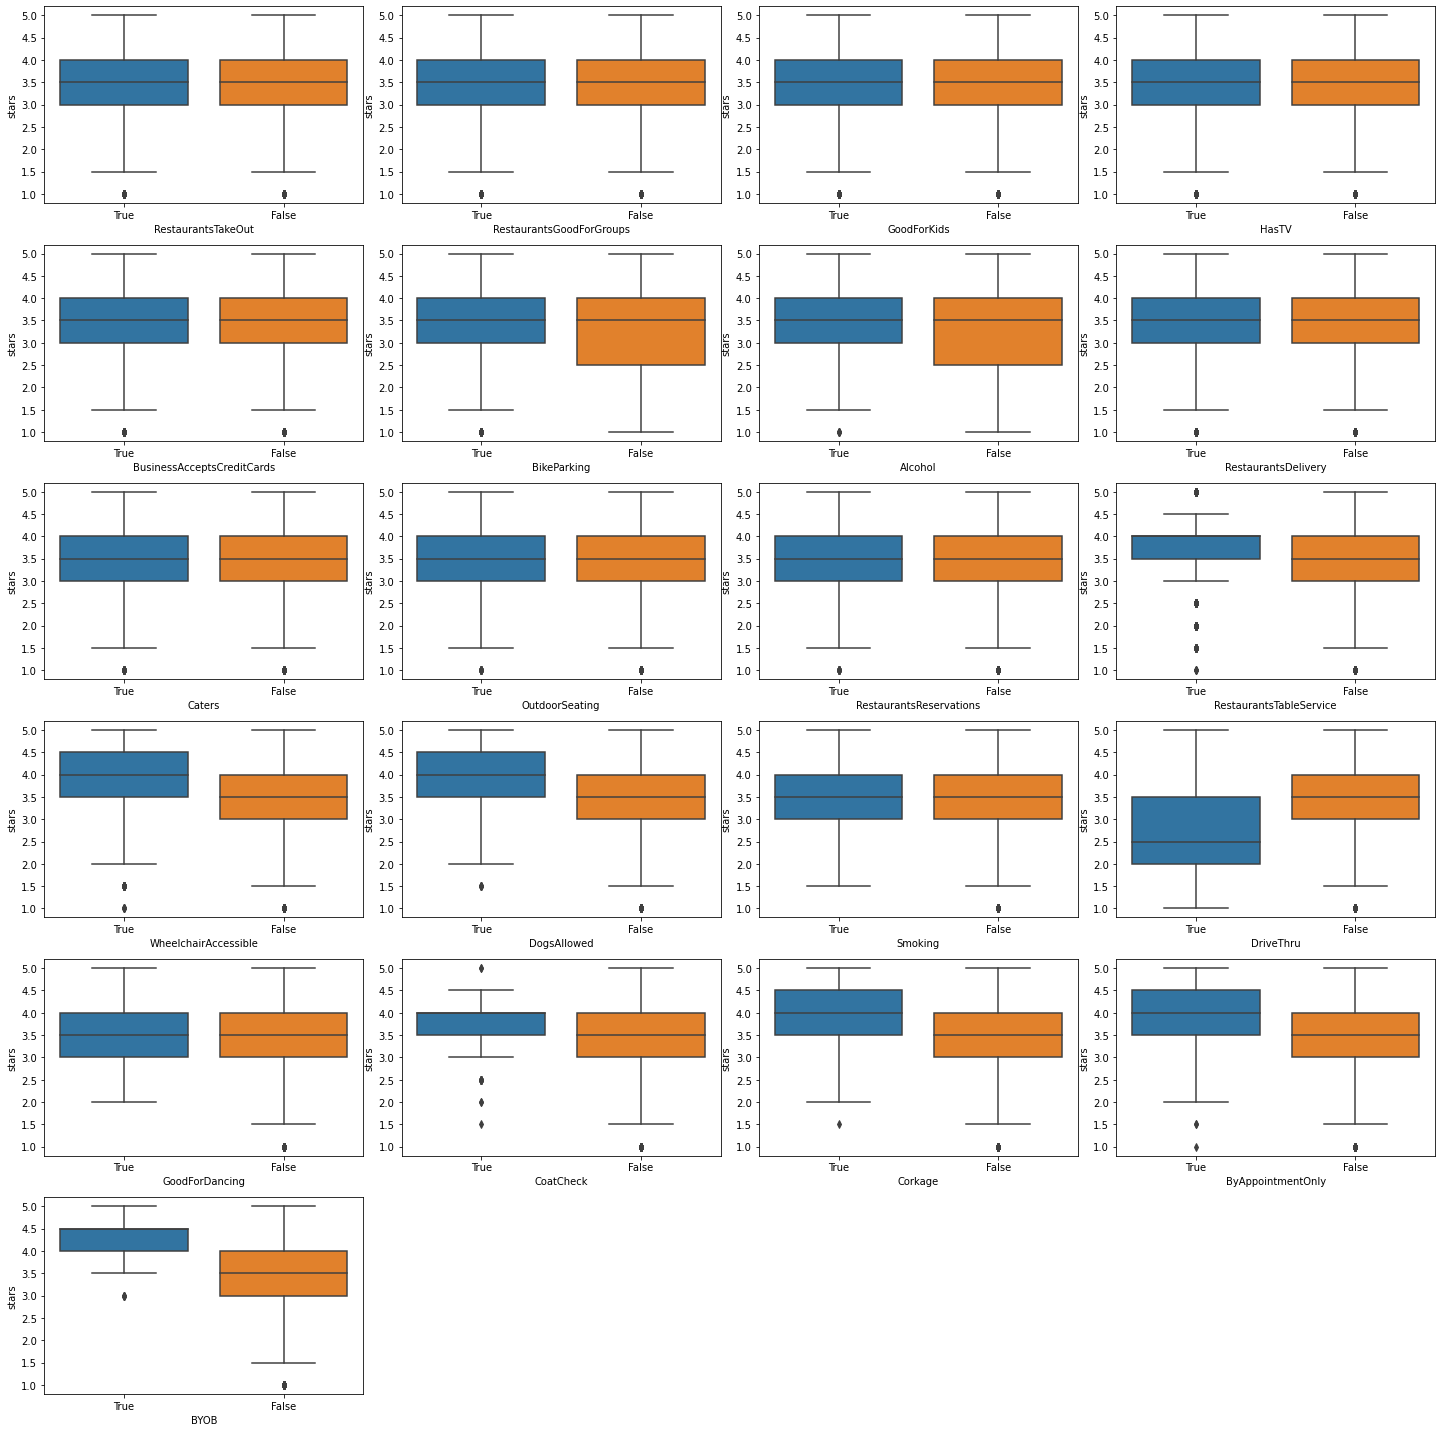

In [ ]:
# ratings of restaurants (boxplot) when atributes yes vs attributes nan or no
plt.figure(figsize=(20, 20))
for i, col in enumerate(columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(y='stars', x=col, data=rest_and_attr, order=[True, False])
plt.tight_layout()

In [ ]:
# ratings of other attributes such as Ambience, price range dietary restricts boxplots 

## Ckeckin Data

In [ ]:
# Merge checkin dataset with restaurantdf to add some necessary columns and drop rows with business categories other than restaurants
merger1 = pd.merge(restaurantsdf,checkindf, how='left', on='business_id')
merger1.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,city_state,drop,date
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...",Restaurants,"Champaign,IL",False,"2013-02-28 19:53:31, 2013-03-14 18:01:50, 2017..."
1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"{'RestaurantsTableService': 'False', 'Restaura...",Restaurants,"Aurora,ON",False,2019-01-04 01:13:15
2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants,"Thornhill,ON",False,"2014-11-28 18:55:44, 2016-06-12 01:00:30, 2016..."


In [ ]:
#create a column with counts of date
def count_checkins(dates):
    if dates != 0:
        c = dates.count(',') + 1
        return c
    return 0

merger1['date'].fillna(0, inplace=True)
merger1['checkin count'] = merger1['date'].apply(count_checkins)

In [ ]:
merger1.sort_values(by='checkin count', ascending=False, inplace=True)
merger1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,city_state,drop,date,checkin count
16273,5LNZ67Yw9RD6nf4_UhXOjw,The Cosmopolitan of Las Vegas,3708 Las Vegas Blvd S,Las Vegas,NV,89109,36.109755,-115.173877,4.0,4740,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",Restaurants,"Las Vegas,NV",False,"2010-07-20 13:11:27, 2010-11-08 16:56:23, 2010...",48606
17140,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.115929,-115.176238,4.0,10129,"{'BikeParking': 'False', 'OutdoorSeating': 'Fa...",Restaurants,"Las Vegas,NV",False,"2012-09-06 19:40:09, 2012-09-10 15:20:23, 2012...",45313
29642,IZivKqtHyz4-ts8KsnvMrA,Kung Fu Tea,"5030 Spring Mountain Rd, Ste 8",Las Vegas,NV,89146,36.127039,-115.209819,4.5,1386,"{'WiFi': 'u'free'', 'BusinessParking': '{'gara...",Restaurants,"Las Vegas,NV",False,"2014-07-03 05:26:09, 2014-07-04 02:08:10, 2014...",42818
3961,hihud--QRriCYZw1zZvW4g,Gangnam Asian BBQ Dining,"4480 Paradise Rd, Ste 600",Las Vegas,NV,89169,36.109315,-115.151063,4.5,3512,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...",Restaurants,"Las Vegas,NV",False,"2013-03-17 00:41:53, 2013-03-17 02:41:06, 2013...",35979
37771,Wxxvi3LZbHNIDwJ-ZimtnA,The Venetian Las Vegas,3355 South Las Vegas Boulevard,Las Vegas,NV,89109,36.121189,-115.169657,4.0,3873,"{'RestaurantsDelivery': 'True', 'BusinessParki...",Restaurants,"Las Vegas,NV",False,"2010-01-16 18:05:13, 2010-01-24 10:27:06, 2010...",34080


In [ ]:
# plot
fig = px.bar(merger1.head(10), x="name", y="checkin count", color="stars",
                 text='checkin count',
                 title="Ratings of Restaurants with High Checkin Counts",
                 width=1100,
                 height=780,
                labels={'name': 'Restaurants', 'checkin count': 'Checkin Count'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

In [ ]:
# plot
fig = px.bar(merger1.head(10), x="name", y="review_count", color="stars", text='review_count',
                 title="Ratings and Review Count of Restaurants with High Checkin Count",
                 width=1100,
                 height=780,
                labels={'name': 'Restaurants', 'review_count': 'Review Count'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

## Tips data

In [ ]:
new_tipsdf = pd.merge(tipsdf, merger1[['name', 'city_state', 'business_id']], how='left', on='business_id')
new_tipsdf.dropna(inplace=True)

In [ ]:
new_tipsdf.head()

,user_id,business_id,text,date,compliment_count,name,city_state
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0,Hardee's,"Huntersville,NC"
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0,Teriyaki House,"Las Vegas,NV"
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0,Pho Thanh Huong,"Las Vegas,NV"
5,HHNBqfbDR8b1iq-QGxu8ww,ALwAlxItASeEs2vYAeLXHA,Great ramen! Not only is the presentation gorg...,2015-05-20 20:17:38,0,Futo Buta,"Charlotte,NC"
6,r0j4IpUbcdC1-HfoMYae4w,d_L-rfS1vT3JMzgCUGtiow,Cochinita Pibil was memorable & delicious !,2014-09-01 01:23:48,0,Border Grill,"Las Vegas,NV"


In [ ]:
restaurants_count = new_tipsdf['business_id'].nunique()
users_count = new_tipsdf['user_id'].nunique()
total_tips = new_tipsdf.shape[0]
print('Total number of tips:',total_tips)
print('Restaurant count:',restaurants_count)
print('User count:',users_count)

Total number of tips: 695839
Restaurant count: 37387
User count: 255879


In [ ]:
#use the date finally to see if users went to a resturant more on the weekeday or weekend
new_tipsdf['WEEKDAY'] = pd.to_datetime(new_tipsdf['date']).dt.dayofweek 
new_tipsdf.head()

,user_id,business_id,text,date,compliment_count,name,city_state,WEEKDAY
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0,Hardee's,"Huntersville,NC",0
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0,Teriyaki House,"Las Vegas,NV",4
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0,Pho Thanh Huong,"Las Vegas,NV",4
5,HHNBqfbDR8b1iq-QGxu8ww,ALwAlxItASeEs2vYAeLXHA,Great ramen! Not only is the presentation gorg...,2015-05-20 20:17:38,0,Futo Buta,"Charlotte,NC",2
6,r0j4IpUbcdC1-HfoMYae4w,d_L-rfS1vT3JMzgCUGtiow,Cochinita Pibil was memorable & delicious !,2014-09-01 01:23:48,0,Border Grill,"Las Vegas,NV",0


In [ ]:
# function to get weekday from a date
def isWeekend(day):
  if day in [5, 6]:
    return True
  return False

# mapping int to str days
weekdays = {0: 'MON', 1: 'TUE', 2: 'WED', 3: 'THU', 4: 'FRI', 5: 'SAT', 6: 'SUN'}

new_tipsdf['isWeekEnd'] = new_tipsdf['WEEKDAY'].apply(isWeekend)
new_tipsdf['DAY'] = new_tipsdf['WEEKDAY'].apply(lambda x: weekdays[x])
new_tipsdf.head(3)

,user_id,business_id,text,date,compliment_count,name,city_state,WEEKDAY,isWeekEnd,DAY
2,AY-laIws3S7YXNl_f_D6rQ,rDoT-MgxGRiYqCmi0bG10g,Very nice good service good food,2016-07-18 22:03:42,0,Hardee's,"Huntersville,NC",0,False,MON
3,Ue_7yUlkEbX4AhnYdUfL7g,OHXnDV01gLokiX1ELaQufA,It's a small place. The staff is friendly.,2014-06-06 01:10:34,0,Teriyaki House,"Las Vegas,NV",4,False,FRI
4,LltbT_fUMqZ-ZJP-vJ84IQ,GMrwDXRlAZU2zj5nH6l4vQ,"8 sandwiches, $24 total...what a bargain!!! An...",2011-04-08 18:12:01,0,Pho Thanh Huong,"Las Vegas,NV",4,False,FRI


In [ ]:
plotdf = pd.DataFrame(new_tipsdf.DAY.value_counts())
plotdf.reset_index(inplace=True)

# plot
fig = px.bar(plotdf, x="index", y="DAY", text='DAY',
                 title="Users went to a resturant more on the weekedays or weekends?",
                 width=1000,
                 height=700,
                labels={'index': 'DAY', 'DAY': 'Total Visit Count'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

In [ ]:
# histogram of tips count per user.
data = new_tipsdf.business_id.value_counts().values
fig = px.histogram(x=np.log(data), nbins=10, width=600, title='Distribution of Tips Count Per User', labels={'x': 'Tips Count Per User'})
fig.show()

In [ ]:
# restaurant with the most compliment count 
top10_cmpcounts = new_tipsdf.groupby('business_id')[['compliment_count']].sum().sort_values(by='compliment_count', ascending=False).head(10)
top10_cmpcounts.reset_index(inplace=True)
top10merge_df = pd.merge(top10_cmpcounts, merger1[['stars', 'name', 'city_state', 'business_id']], how='left', on='business_id')

In [ ]:
# plot restaurants with most compliments
fig = px.bar(top10merge_df, x="name", y="compliment_count", color="stars", text='compliment_count',
                 title="Restaurants With Most Compliment Count",
                 width=1100,
                 height=780,
                labels={'name': 'Restaurants', 'compliment_count': 'Compliment Count'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

## User data

In [ ]:
def count_friends(data):
    return data.count(',') + 1

In [ ]:
userdf['friends_count'] = userdf['friends'].apply(count_friends)
userdf.head()

,yelping_since,friends,average_stars,cool,funny,fans,name,review_count,useful,user_id,friends_count
0,2007-07-06 03:27:11,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",3.57,227,225,14,Rafael,553,628,ntlvfPzc8eglqvk92iDIAw,45
1,2008-04-28 01:29:25,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",3.84,400,316,27,Michelle,564,790,FOBRPlBHa3WPHFB5qYDlVg,213
2,2008-08-28 23:40:05,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",3.44,103,125,5,Martin,60,151,zZUnPeh2hEp0WydbAZEOOg,35
3,2008-09-20 00:08:14,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",3.08,84,160,6,John,206,233,QaELAmRcDc5TfJEylaaP8g,173
4,2008-08-09 00:30:27,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",4.37,512,400,78,Anne,485,1265,xvu8G900tezTzbbfqmTKvA,895


In [ ]:
# plot restaurants with most compliments
fig = px.bar(top10mostfriends, x="name", y="friends_count", text='friends_count',
                 title="Users With Highest Number of Friends",
                 width=1100,
                 height=700,
                labels={'name': 'User', 'friends_count': 'Friends Count'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

In [ ]:
review_total = userdf.sort_values(by='review_count',ascending=True)
fans = userdf.sort_values(by='fans',ascending=True)
useful = userdf.sort_values(by='useful',ascending=True)


In [ ]:
# plot restaurants with most compliments
fig = px.bar(fans.tail(10), x="name", y="fans", text='fans',
                 title="Most Followed Users",
                 width=800,
                 height=700,
                labels={'name': 'User', 'fans': 'No. of Fans'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

In [ ]:
# plot restaurants with most compliments
fig = px.bar(useful.tail(10), x="name", y="useful", text='useful',
                 title="Users with the Most Useful Reviews",
                 width=1000,
                 height=700,
                labels={'name': 'User', 'useful': 'No. of Reviews'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

In [ ]:
# plot restaurants with most compliments
fig = px.bar(review_total.tail(10), x="name", y="review_count", text='review_count',
                 title="Most Active Users",
                 width=1000,
                 height=700,
                labels={'name': 'User', 'review_count': 'No. of Reviews'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

## Review data

In [ ]:
restaurantsdf.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,city_state,drop
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...",Restaurants,"Champaign,IL",False
1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"{'RestaurantsTableService': 'False', 'Restaura...",Restaurants,"Aurora,ON",False
2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants,"Thornhill,ON",False
3,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,"{'Ambience': '{'touristy': False, 'hipster': F...",Restaurants,"Richmond Hill,ON",False
4,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants,"Phoenix,AZ",False


In [ ]:
# Filter out rows which are not restaurants
rest_reviewdf = reviewdf[reviewdf['business_id'].isin(restaurantsdf['business_id'])]
rest_reviewdf.rename(columns={'stars': 'user_rating'}, inplace=True)
rest_reviewdf.head()

,useful,user_id,date,cool,funny,user_rating,business_id,review_id
2,1,V34qejxNsCbcgD8C0HVk-Q,2015-12-05 03:18:11,0,0,5.0,HQl28KMwrEKHqhFrrDqVNQ,LG2ZaYiOgpr2DK_90pYjNw
4,0,UgMW8bLE0QMJDCkQ1Ax5Mg,2017-01-14 21:56:57,0,0,4.0,IS4cv902ykd8wj1TR0N3-A,6TdNDKywdbjoTkizeMce8A
5,2,5vD2kmE25YBrbayKhykNxQ,2013-05-07 07:25:25,0,0,5.0,nlxHRv1zXGT0c0K51q3jDg,L2O_INwlrRuoX05KSjc4eg
6,1,aq_ZxGHiri48TUXJlpRkCQ,2015-11-05 23:11:05,0,0,5.0,Pthe4qk5xh4n-ef-9bvMSg,ZayJ1zWyWgY9S_TRLT_y9Q
8,0,P6apihD4ASf1vpPxHODxAQ,2015-02-16 06:48:47,0,0,5.0,e_BiI4ej1CW1F0EyVLr-FQ,JA-xnyHytKiOIHl_ztnK9Q


In [ ]:
# merge dataframes
rest_review_merged = pd.merge(rest_reviewdf, restaurantsdf, how='left', on='business_id')

In [ ]:
# rename columns
rest_review_merged.rename(columns={'stars': 'avg_rating'}, inplace=True)
rest_review_merged.head()

,useful,user_id,date,cool,funny,user_rating,business_id,review_id,name,address,city,state,postal_code,latitude,longitude,avg_rating,review_count,attributes,categories,city_state,drop
0,1,V34qejxNsCbcgD8C0HVk-Q,2015-12-05 03:18:11,0,0,5.0,HQl28KMwrEKHqhFrrDqVNQ,LG2ZaYiOgpr2DK_90pYjNw,Deagan's Kitchen & Bar,14810 Detroit Ave,Lakewood,OH,44107,41.485192,-81.800145,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...",Restaurants,"Lakewood,OH",False
1,0,UgMW8bLE0QMJDCkQ1Ax5Mg,2017-01-14 21:56:57,0,0,4.0,IS4cv902ykd8wj1TR0N3-A,6TdNDKywdbjoTkizeMce8A,Raising Cane's Chicken Fingers,110 N Stephanie St,Henderson,NV,89074,36.035068,-115.046353,3.5,159,"{'DriveThru': 'True', 'GoodForMeal': '{'desser...",Restaurants,"Henderson,NV",False
2,2,5vD2kmE25YBrbayKhykNxQ,2013-05-07 07:25:25,0,0,5.0,nlxHRv1zXGT0c0K51q3jDg,L2O_INwlrRuoX05KSjc4eg,Firehouse Subs,"510 Marks St, Unit B-1, Ste 110",Henderson,NV,89014,36.059969,-115.036032,3.0,93,"{'Ambience': '{'romantic': False, 'intimate': ...",Restaurants,"Henderson,NV",False
3,1,aq_ZxGHiri48TUXJlpRkCQ,2015-11-05 23:11:05,0,0,5.0,Pthe4qk5xh4n-ef-9bvMSg,ZayJ1zWyWgY9S_TRLT_y9Q,Chon Thai Food,"2330 N Alma School Rd, Ste 116",Chandler,AZ,85224,33.339962,-111.859727,4.5,555,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...",Restaurants,"Chandler,AZ",False
4,0,P6apihD4ASf1vpPxHODxAQ,2015-02-16 06:48:47,0,0,5.0,e_BiI4ej1CW1F0EyVLr-FQ,JA-xnyHytKiOIHl_ztnK9Q,Casa Mia,11485 N 136th St,Scottsdale,AZ,85259,33.590695,-111.786547,4.5,85,"{'RestaurantsGoodForGroups': 'True', 'Restaura...",Restaurants,"Scottsdale,AZ",False


In [ ]:
# define columns to drop and drop it
columns_to_drop = ['review_id', 'address', 'postal_code', 'latitude', 'longitude', 'city', 'state', 'categories', 'cool', 'funny', 'date']
rest_review_merged.drop(columns=columns_to_drop, inplace=True)
rest_review_merged.head() 

,useful,user_id,user_rating,business_id,name,avg_rating,review_count,attributes,city_state,drop
0,1,V34qejxNsCbcgD8C0HVk-Q,5.0,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Lakewood,OH",False
1,0,UgMW8bLE0QMJDCkQ1Ax5Mg,4.0,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fingers,3.5,159,"{'DriveThru': 'True', 'GoodForMeal': '{'desser...","Henderson,NV",False
2,2,5vD2kmE25YBrbayKhykNxQ,5.0,nlxHRv1zXGT0c0K51q3jDg,Firehouse Subs,3.0,93,"{'Ambience': '{'romantic': False, 'intimate': ...","Henderson,NV",False
3,1,aq_ZxGHiri48TUXJlpRkCQ,5.0,Pthe4qk5xh4n-ef-9bvMSg,Chon Thai Food,4.5,555,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...","Chandler,AZ",False
4,0,P6apihD4ASf1vpPxHODxAQ,5.0,e_BiI4ej1CW1F0EyVLr-FQ,Casa Mia,4.5,85,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Scottsdale,AZ",False


In [ ]:
print("{} rows in rest_review_merged".format(rest_review_merged.shape[0]))
print("{} unique users".format(rest_review_merged.user_id.nunique()))
print("{} unique restaurants".format(rest_review_merged.business_id.nunique()))

4222573 rows in rest_review_merged
1279690 unique users
43959 unique restaurants


In [ ]:
# create final dataset
final_merged_df = pd.merge(rest_review_merged, userdf, how='left', on='user_id')
final_merged_df.head()

,useful_x,user_id,user_rating,business_id,name_x,avg_rating,review_count_x,attributes,city_state,drop,yelping_since,friends,average_stars,cool,funny,fans,name_y,review_count_y,useful_y,friends_count
0,1,V34qejxNsCbcgD8C0HVk-Q,5.0,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Lakewood,OH",False,2014-11-05 14:36:08,"ZlOgxIThXJYkHPLj2fiYAw, XZg_60BabYR1t2aGqN10PQ...",4.02,126,53,20,Danielle,199,232,404
1,0,UgMW8bLE0QMJDCkQ1Ax5Mg,4.0,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fingers,3.5,159,"{'DriveThru': 'True', 'GoodForMeal': '{'desser...","Henderson,NV",False,2014-07-21 00:47:49,"MC0e6zrMjetYx9zIjrV8cw, qfXZ6IYtWJNX5wc1gy_mhQ...",3.61,143,108,12,Micah,293,304,65
2,2,5vD2kmE25YBrbayKhykNxQ,5.0,nlxHRv1zXGT0c0K51q3jDg,Firehouse Subs,3.0,93,"{'Ambience': '{'romantic': False, 'intimate': ...","Henderson,NV",False,2013-03-18 21:32:18,"vdR9dCBu7snPWHnWVV8XxA, ZhLo7Npbba3rA9A3mtkNow...",3.91,831,457,36,Gary,251,1242,314
3,1,aq_ZxGHiri48TUXJlpRkCQ,5.0,Pthe4qk5xh4n-ef-9bvMSg,Chon Thai Food,4.5,555,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...","Chandler,AZ",False,2014-05-30 18:53:04,"bOZsEwbBpRmIH9IXjWMw6g, uJO3fQ51I1Db-WvShGqlXw...",4.61,10,6,1,Jagan,55,36,4
4,0,P6apihD4ASf1vpPxHODxAQ,5.0,e_BiI4ej1CW1F0EyVLr-FQ,Casa Mia,4.5,85,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Scottsdale,AZ",False,2013-10-05 22:07:56,"ww2Gtw7QnhS2HTIScvKzxg, uFd9-cr7EnLledYgp3mjgw...",5.00,0,0,0,Marodin,3,0,5


In [ ]:
# final_merged_df.to_pickle('/content/finaldf.pkl')

In [ ]:
# !pip install pickle5

In [ ]:
import pickle5 as pickle
# recreate users.pickle python 3.7 compatible
with open(base_path+"finaldf.pkl", "rb") as fh:
  data = pickle.load(fh)
data.to_pickle(base_path+"finaldf.pkl")

In [ ]:
df = pd.read_pickle(base_path+'finaldf.pkl')

In [ ]:
df.head()

,index,user_id,date,rating,business_id,name,latitude,longitude,avg_rest_rating,review_count,attributes,avg_user_rating,fans,user_review_count,useful
0,0,V34qejxNsCbcgD8C0HVk-Q,2015-12-05 03:18:11,5.0,HQl28KMwrEKHqhFrrDqVNQ,Deagan's Kitchen & Bar,41.485192,-81.800145,4.0,417,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...",4.02,20,199,232
1,1,UgMW8bLE0QMJDCkQ1Ax5Mg,2017-01-14 21:56:57,4.0,IS4cv902ykd8wj1TR0N3-A,Raising Cane's Chicken Fingers,36.035068,-115.046353,3.5,159,"{'DriveThru': 'True', 'GoodForMeal': '{'desser...",3.61,12,293,304
2,2,5vD2kmE25YBrbayKhykNxQ,2013-05-07 07:25:25,5.0,nlxHRv1zXGT0c0K51q3jDg,Firehouse Subs,36.059969,-115.036032,3.0,93,"{'Ambience': '{'romantic': False, 'intimate': ...",3.91,36,251,1242
3,3,aq_ZxGHiri48TUXJlpRkCQ,2015-11-05 23:11:05,5.0,Pthe4qk5xh4n-ef-9bvMSg,Chon Thai Food,33.339962,-111.859727,4.5,555,"{'RestaurantsPriceRange2': '2', 'RestaurantsTa...",4.61,1,55,36
4,5,HJECayULRM-6xh2GCCvLiA,2015-10-17 01:38:13,4.0,l-nL4BmhzpZjcavooO48PQ,The Wokker Restaurant,43.648896,-79.604506,3.5,33,"{'Alcohol': 'u'full_bar'', 'BusinessParking': ...",3.55,13,314,367


In [ ]:
df.groupby('user_id').index.count()

user_id
---1lKK3aKOuomHnwAkAow    31
---udAKDsn0yQXmzbWQNSw     2
--0zxhZTSLZ7w1hUD2bEwA     2
--1UpCuUDJQbqiuFXkOzaw     2
--1av6NdbEbMiuBr7Aup9A     1
                          ..
zzxtlSq9uFbgCeOzLtuglA     1
zzyzP--p98zZtx359NvgGA     1
zzz-M4QvkEpUWWPL9RTzLA     1
zzzPVqSxSvjzlLR3Q7wsUw     1
zzzTkKLFo9CaeZnfO4TvzA     1
Name: index, Length: 545384, dtype: int64

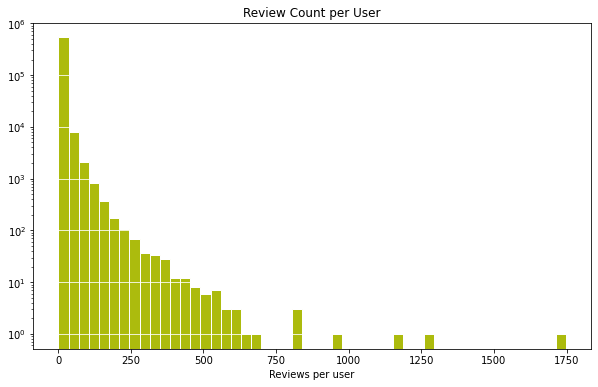

In [ ]:
plt.figure(figsize=(10,6))
urc=df.groupby('user_id').index.count()
urc.hist(bins=50,log=True,edgecolor='white',color='#acbb0d')
plt.xlabel("Reviews per user")
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.title("Review Count per User");

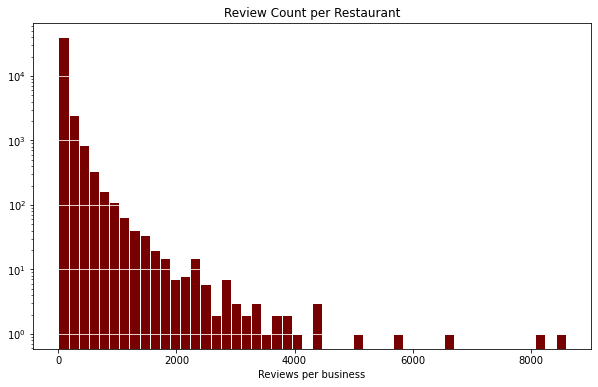

In [ ]:
plt.figure(figsize=(10,6))
brc=df.groupby('business_id').index.count()
brc.hist(bins=50,log=True,edgecolor='white',color='#770001')
plt.xlabel("Reviews per business")
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')
plt.title("Review Count per Restaurant");

Average rating of all reviews in the dataset is 3.79


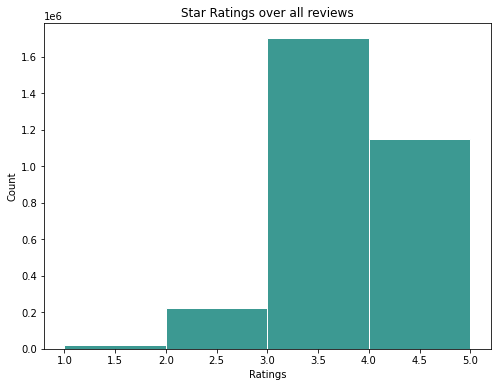

In [ ]:
print('Average rating of all reviews in the dataset is',round(df.avg_user_rating.mean(),2))
plt.figure(figsize=(8,6))
r=df.avg_user_rating
r.hist(bins=4,edgecolor='white',color='#3c9992')
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.grid(False)
plt.title("Star Ratings over all reviews");

# Additional analysis

## Influence of Yelp 

We're far from the age when restaurant complains were limited to asking to see the manager and just a click away from broadcasting our experience to the world. Yelp is a well-known forum for diners to rate the good, the bad and the ugly in the culinary scene. We'll now try to access the 'usefulness' factor of these reviews and the influence of one user on another in the user-based, unregulated domain of online reviews.

In [ ]:
# Creating a column to indicate the usefulness of a review by a user out of all the reviews
userdf['ratio'] = (userdf['useful'] * userdf['review_count']) / sum(userdf['review_count'])
influence = userdf.sort_values(by='ratio',ascending=True)[['name','review_count','useful','ratio','yelping_since']]

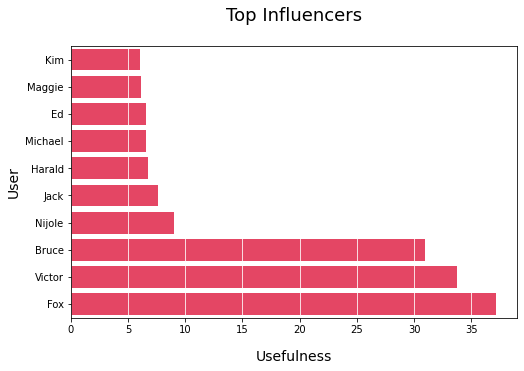

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y=influence['name'][-10:],x=influence['ratio'][-10:],color='#fe2c54')
plt.title('Top Influencers',fontsize=18, pad=25.0) 
plt.xlabel('Usefulness', fontsize=14, labelpad=15.0)
plt.ylabel('User', fontsize=14)
plt.grid(False)
plt.grid(axis = 'x', color ='white', linestyle='-')

<h3> User activity </h3>

The plot summarizes the user activity on yelp and thereby the popularity of the website itself.

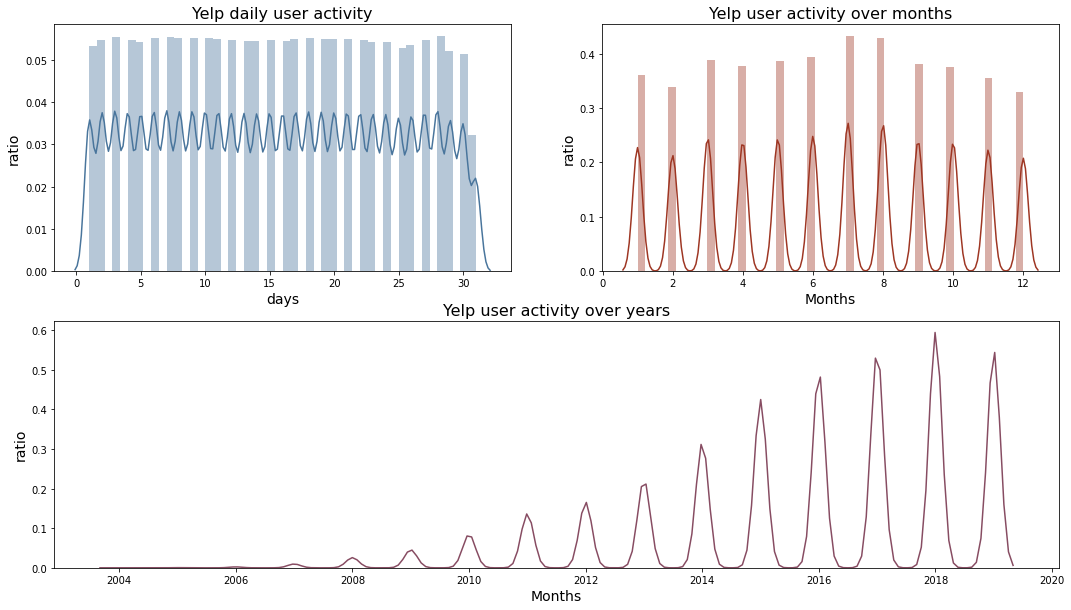

In [ ]:
import matplotlib.gridspec as gridspec

gridspec.GridSpec(2,2)

plt.figure(figsize=(18,10)) 

plt.subplot2grid((2,2), (0,0))
sns.distplot(reviewdf['date'].dt.day, color='#49759c')
plt.title('Yelp daily user activity',fontsize=16)
plt.xlabel('days', fontsize=14)
plt.ylabel('ratio', fontsize=14)

plt.subplot2grid((2,2), (0,1))
sns.distplot(reviewdf['date'].dt.month, color='#9e3623')
plt.title('Yelp user activity over months',fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('ratio', fontsize=14)

plt.subplot2grid((2,2), (1,0),colspan=2, rowspan=2)
sns.distplot(reviewdf['date'].dt.year, color='#874c62',hist=False)
plt.title('Yelp user activity over years',fontsize=16)
plt.xlabel('Months', fontsize=14)
plt.ylabel('ratio', fontsize=14)
plt.show()

## Chain Restaurants Vs Indie Restaurants

In [ ]:
restaurantsdf.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,city_state
0,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...",Restaurants,"Champaign,IL"
1,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"{'RestaurantsTableService': 'False', 'Restaura...",Restaurants,"Aurora,ON"
2,lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,300 John Street,Thornhill,ON,L3T 5W4,43.820492,-79.398466,4.5,7,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants,"Thornhill,ON"
3,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,"{'Ambience': '{'touristy': False, 'hipster': F...",Restaurants,"Richmond Hill,ON"
4,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",Restaurants,"Phoenix,AZ"


In [ ]:
res_count = restaurantsdf.name.value_counts()
res_count = res_count.sort_values(ascending = False)

In [ ]:
dfres = pd.DataFrame(res_count)

In [ ]:
chain = []
indie = []

for i in dfres.index:
  if res_count[i] > 10:
    chain.append(i)
  else:
    indie.append(i)
print("Chain Restaurants:",chain)
print("Independent Restaurants:",indie)

Chain Restaurants: ["McDonald's", 'Subway Restaurants', 'Taco Bell', 'Burger King', "Wendy's", 'Pizza Hut', 'Tim Hortons', "Domino's Pizza", 'KFC', 'Starbucks', 'Chipotle Mexican Grill', 'Jack in the Box', "Jimmy John's", 'Popeyes Louisiana Kitchen', 'Panera Bread', 'Panda Express', "Papa John's Pizza", 'Subway', "Arby's", 'Little Caesars Pizza', 'Pizza Pizza', "Denny's", 'Chick-fil-A', "Jersey Mike's Subs", 'A&W', 'Dairy Queen', 'Five Guys', 'Dairy Queen Grill & Chill', 'Sonic Drive-In', 'Firehouse Subs', 'Swiss Chalet Rotisserie & Grill', 'IHOP', 'Freshii', "Applebee's Grill + Bar", 'Del Taco', "Filiberto's Mexican Food", 'Boston Pizza', 'Buffalo Wild Wings', 'Pizza Nova', 'Thai Express', "Harvey's", "Chili's", "Marco's Pizza", "Papa Murphy's", 'Wingstop', "Dunkin'", 'Sunset Grill', 'Olive Garden Italian Restaurant', 'Port of Subs', 'El Pollo Loco', 'Tropical Smoothie Cafe', 'Einstein Bros Bagels', "Bojangles' Famous Chicken 'n Biscuits", "Roberto's Taco Shop", 'Smashburger', 'Red Lo

In [ ]:
chaindf = restaurantsdf[restaurantsdf['name'].isin(chain)]
chaindf = chaindf.sort_values(by='review_count',ascending=False)
chaindf.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,city_state
32225,QJatAcxYgK1Zp9BRZMAx7g,Shake Shack,3790 Las Vegas Blvd S,Las Vegas,NV,89109,36.103061,-115.173450,4.0,3097,"{'RestaurantsReservations': 'False', 'GoodForK...",Restaurants,"Las Vegas,NV"
6747,lKom12WnYEjH5FFemK3M1Q,Primanti Bros,46 18th St,Pittsburgh,PA,15222,40.450706,-79.985588,3.5,1380,"{'Corkage': 'False', 'RestaurantsReservations'...",Restaurants,"Pittsburgh,PA"
5666,nVAJZ6BJ9PPlxDXn976R6A,In-N-Out Burger,4888 Dean Martin Dr,Las Vegas,NV,89103,36.101320,-115.182186,4.0,1164,"{'WiFi': 'u'no'', 'RestaurantsReservations': '...",Restaurants,"Las Vegas,NV"
6605,XQJr9_jZR1vOoZVcZfDDwQ,Cracker Barrel Old Country Store,8350 Dean Martin Dr,Las Vegas,NV,89139,36.037939,-115.181829,3.0,1044,"{'Ambience': '{'romantic': False, 'intimate': ...",Restaurants,"Las Vegas,NV"
31789,YQ--LJ7pvjiDSqNv0TuKTQ,Grimaldi's Pizzeria,"3327 Las Vegas Blvd S, Ste 2710",Las Vegas,NV,89109,36.124768,-115.168343,4.0,1016,"{'Alcohol': 'u'full_bar'', 'RestaurantsTakeOut...",Restaurants,"Las Vegas,NV"


In [ ]:
indiedf = restaurantsdf[restaurantsdf['name'].isin(indie)]
indiedf = indiedf.sort_values(by='review_count',ascending=False)
indiedf.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,categories,city_state
17141,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.115929,-115.176238,4.0,10129,"{'BikeParking': 'False', 'OutdoorSeating': 'Fa...",Restaurants,"Las Vegas,NV"
24832,4JNXUYY8wbaaDmk3BPzlWw,Mon Ami Gabi,3655 Las Vegas Blvd S,Las Vegas,NV,89109,36.112859,-115.172434,4.0,9264,"{'RestaurantsDelivery': 'False', 'GoodForKids'...",Restaurants,"Las Vegas,NV"
30968,K7lWdNUhCbcnEvI0NhGewg,Wicked Spoon,"The Cosmopolitan Of Las Vegas, Level 2, The Ch...",Las Vegas,NV,89109,36.109550,-115.176155,3.5,7383,"{'GoodForKids': 'True', 'OutdoorSeating': 'Fal...",Restaurants,"Las Vegas,NV"
17460,f4x1YBxkLrZg652xt2KR5g,Hash House A Go Go,3535 Las Vegas Blvd,Las Vegas,NV,89109,36.118181,-115.171580,4.0,6751,"{'RestaurantsPriceRange2': '2', 'NoiseLevel': ...",Restaurants,"Las Vegas,NV"
20172,DkYS3arLOhA8si5uUEmHOw,Earl of Sandwich,3667 Las Vegas Blvd S,Las Vegas,NV,89109,36.109408,-115.171874,4.5,5232,"{'BusinessParking': '{'garage': True, 'street'...",Restaurants,"Las Vegas,NV"


Notice that independent restaurants are a lot more reviewed than chain restaurants on average which is counter-intuitive, considering they don't have as much footfall or store fronts. Does the general public tend to be more critical about these than the chain restaurants? Or could it be because the people want to leave reviews (good or bad) that matter more than they do for the food giants?

In [ ]:
top_chain = ['Shake Shack','Primanti Bros','In-N-Out Burger','Cracker Barrel Old Country Store',"Grimaldi's Pizzeria",
             'Melt Bar and Grilled','Steak ’n Shake','The Cheesecake Factory',"Oregano's Pizza Bistro","BJ's Restaurant & Brewhouse"]
top_chain_ratings = [4.0,3.5,4.0,3.0,4.0,4.0,3.5,3.5,4.0,3.5]

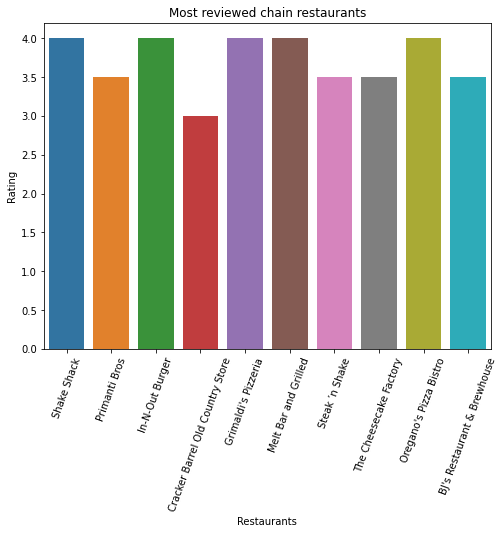

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(top_chain,top_chain_ratings)
plt.xlabel('Restaurants')
plt.ylabel('Rating')
plt.xticks(rotation=70)
plt.title("Most reviewed chain restaurants")
plt.show()

In [ ]:
fig = px.bar(x=top_chain, y=top_chain_ratings, color=top_chain_ratings, width=1000, height=700,
             labels={'x': 'Restaurant', 'y': 'Rating'}, title='Most reviewed chain restaurants'
             )
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()

In [ ]:
t_indie = indiedf[:10]
top_indie = list(t_indie['name'])

In [ ]:
fig = px.bar(x=top_indie, y=indiedf[:10].stars, color=indiedf[:10].stars, width=1000, height=700,
             labels={'x': 'Restaurant', 'y': 'Rating'}, title = 'Most reviewed Indie restaurants')
fig.update_layout(xaxis_tickangle=45, 
                  font=dict(
                  family="Times New Roman",
                  size=20,
                  color='black'
                  ),
                  title_font_family="Times New Roman",
                  title_font_color="black",
                  title_font_size=30
                  )

fig.show()